In [1]:
import pandas as pd
import os
import random

In [2]:
idle_directory = "../data/combined data files/idle/"
attack_directory = "../data/combined data files/spectre/"

idle_files = [file for file in os.listdir(idle_directory)]
attack_files = [file for file in os.listdir(attack_directory)]

file = idle_directory + idle_files[1]
file

'../data/combined data files/idle/Idle_20241118_113051.csv'

In [3]:
df = pd.read_csv(file)
df.columns.tolist()

['index',
 'Offcore All Data Reads LLC Any Response',
 'Offcore All Data Reads LLC Miss to DRAM',
 'Offcore Demand Data Reads LLC Miss to DRAM',
 'Offcore Demand Data Reads LLC Hit Any Response',
 'Branch Instructions',
 'Branch Misses',
 'Cache References',
 'Cache Misses',
 'L1 Data Cache Loads',
 'L1 Data Cache Load Misses',
 'Executed Branch Instructions',
 'Executed Conditional Branches',
 'Executed Branch Mispredictions',
 'Executed Conditional Branch Mispredictions',
 'Retired Branch Mispredictions',
 'Retired Near-Taken Branch Mispredictions',
 'L2 All Demand Data Reads',
 'L2 Demand Data Read Hits',
 'Retired Branch Instructions',
 'Retired Conditional Branches']

In [4]:
branch_misses = "Branch Misses"
branch_instructions = "Branch Instructions"
branch_miss_rate = "Branch Miss Rate"

cache_misses = "Cache Misses"
cache_references = "Cache References"
cache_miss_rate = "Cache Miss Rate"

executed_branch_mispredictions = "Executed Branch Mispredictions"
executed_branch_instructions = "Executed Branch Instructions"
executed_branch_misprediction_rate = "Executed Branch Misprediction Rate"

retired_branch_mispredictions = "Retired Branch Mispredictions"
retired_branch_instructions = "Retired Branch Instructions"
retired_branch_misprediction_rate = "Retired Branch Misprediction Rate"

executed_conditional_branch_mispredictions = "Executed Conditional Branch Mispredictions"
executed_conditional_branches = "Executed Conditional Branches"
executed_conditional_misprediction_rate = "Executed Conditional Misprediction Rate"

retired_near_taken_mispredictions = "Retired Near-Taken Branch Mispredictions"
retired_conditional_branches = "Retired Conditional Branches"
retired_near_taken_misprediction_rate = "Retired Near-Taken to Conditional misprediction Rate"

# Variables provided by you for L1, L2, and L3 cache metrics
L1_data_load_misses = "L1 Data Cache Load Misses"
L1_data_load_all = "L1 Data Cache Loads"
L1_data_load_miss_rate = "L1 Data Cache Load Miss Rate"

L2_demand_data_read_hits = "L2 Demand Data Read Hits"
L2_demand_data_read_all = "L2 All Demand Data Reads"
L2_demand_data_read_hit_rate = "L2 Demand Data Read Hit Ratio"

L3_demand_data_read_misses = "Offcore Demand Data Reads LLC Miss to DRAM"
L3_demand_data_read_hits = "Offcore Demand Data Reads LLC Hit Any Response"
L3_demand_data_read_miss_rate = "Offcore Demand Data Reads LLC Miss Rate"

L3_all_data_read_all = "Offcore All Data Reads LLC Any Response"
L3_all_data_read_misses = "Offcore All Data Reads LLC Miss to DRAM"
L3_all_data_read_miss_rate = "Offcore All Data Reads LLC miss rate"

# additional rates
retired_to_executed_branch_rate = "Retired To Executed Branch Rate"
retired_to_executed_branch_misprediction_rate = "Retired to Executed Branch Misprediction Rate"

rate_pairs = [
    (L1_data_load_misses, L1_data_load_all, L1_data_load_miss_rate),
    (L2_demand_data_read_hits, L2_demand_data_read_all, L2_demand_data_read_hit_rate),
    (L3_all_data_read_misses, L3_all_data_read_all, L3_all_data_read_miss_rate),
    (executed_branch_mispredictions, executed_branch_instructions, executed_branch_misprediction_rate),
    (retired_branch_mispredictions, retired_branch_instructions, retired_branch_misprediction_rate),
    (executed_conditional_branch_mispredictions, executed_conditional_branches, executed_conditional_misprediction_rate),
    (retired_near_taken_mispredictions, retired_conditional_branches, retired_near_taken_misprediction_rate),
    (retired_branch_instructions, executed_branch_instructions, retired_to_executed_branch_rate),
    (retired_branch_mispredictions,executed_branch_mispredictions,retired_to_executed_branch_misprediction_rate),
    (branch_misses, branch_instructions, branch_miss_rate),
    (cache_misses, cache_references, cache_miss_rate),
]

def get_rate(df):
    """
    Compute logical rates from the given DataFrame based on predefined rate pairs.
    Returns a DataFrame with computed rates capped at 1 and infinities replaced with NaN.
    """
    rates_data = {}
    for numerator, denominator, rate_name in rate_pairs:
        rate = df[numerator] / df[denominator]
        rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
        rate = rate.clip(upper=1)  # Cap the rate at 1
        rates_data[rate_name] = rate
    
    rate = df[L3_demand_data_read_misses] / df[L3_demand_data_read_misses]+df[L3_demand_data_read_hits]
    rate = df[numerator] / df[denominator]
    rate.replace([float('inf'), -float('inf')], 0, inplace=True)  # Handle infinities
    rate.fillna(0, inplace=True)
    rate = rate.clip(upper=1)  # Cap the rate at 1
    rates_data[L3_demand_data_read_miss_rate] = rate
    
    return pd.DataFrame(rates_data)


In [5]:
# Directories
idle_directory = "../data/combined data files/idle/"
attack_directory = "../data/combined data files/spectre/"

# Function to load all CSV files except the first one
def load_csv_files(directory):
    files = [file for file in os.listdir(directory) if file.endswith('.csv')]
    return {f"df_{index}": pd.read_csv(os.path.join(directory, file)) for index, file in enumerate(files[1:], start=1)}

# Load dataframes for idle and attack directories
idle_dataframes = load_csv_files(idle_directory)
attack_dataframes = load_csv_files(attack_directory)

# Display available dataframes
print("Idle DataFrames:")
for name, df in idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nAttack DataFrames:")
for name, df in attack_dataframes.items():
    print(f"{name}: {df.shape}")


Idle DataFrames:
df_1: (7673, 21)
df_2: (7003, 21)
df_3: (7003, 21)
df_4: (7003, 21)
df_5: (7004, 21)
df_6: (8003, 21)
df_7: (8003, 21)
df_8: (8003, 21)
df_9: (8004, 21)
df_10: (8003, 21)
df_11: (8003, 21)
df_12: (8003, 21)
df_13: (8003, 21)
df_14: (8003, 21)
df_15: (8002, 21)
df_16: (8003, 21)
df_17: (8003, 21)
df_18: (8003, 21)
df_19: (8003, 21)
df_20: (8003, 21)
df_21: (8003, 21)
df_22: (8003, 21)
df_23: (8003, 21)
df_24: (8003, 21)
df_25: (8003, 21)
df_26: (8003, 21)
df_27: (8003, 21)
df_28: (8003, 21)
df_29: (8003, 21)
df_30: (8003, 21)

Attack DataFrames:
df_1: (7660, 21)
df_2: (9786, 21)
df_3: (10484, 21)
df_4: (7994, 21)
df_5: (9777, 21)
df_6: (7237, 21)
df_7: (8730, 21)
df_8: (7366, 21)
df_9: (9642, 21)
df_10: (7053, 21)
df_11: (9042, 21)
df_12: (9701, 21)
df_13: (6278, 21)
df_14: (8869, 21)
df_15: (10517, 21)
df_16: (7753, 21)
df_17: (6313, 21)
df_18: (6547, 21)
df_19: (8035, 21)
df_20: (7664, 21)
df_21: (10183, 21)
df_22: (8041, 21)
df_23: (7361, 21)
df_24: (7822, 21)
df_25:

In [6]:
# Process idle DataFrames
rate_idle_dataframes = {
    name: get_rate(df).iloc[:5000] for name, df in idle_dataframes.items()
}

# Process attack DataFrames
rate_attack_dataframes = {
    name: get_rate(df).iloc[:5000] for name, df in attack_dataframes.items()
}

# Display new rate DataFrames
print("Rate Idle DataFrames:")
for name, df in rate_idle_dataframes.items():
    print(f"{name}: {df.shape}")

print("\nRate Attack DataFrames:")
for name, df in rate_attack_dataframes.items():
    print(f"{name}: {df.shape}")


Rate Idle DataFrames:
df_1: (5000, 12)
df_2: (5000, 12)
df_3: (5000, 12)
df_4: (5000, 12)
df_5: (5000, 12)
df_6: (5000, 12)
df_7: (5000, 12)
df_8: (5000, 12)
df_9: (5000, 12)
df_10: (5000, 12)
df_11: (5000, 12)
df_12: (5000, 12)
df_13: (5000, 12)
df_14: (5000, 12)
df_15: (5000, 12)
df_16: (5000, 12)
df_17: (5000, 12)
df_18: (5000, 12)
df_19: (5000, 12)
df_20: (5000, 12)
df_21: (5000, 12)
df_22: (5000, 12)
df_23: (5000, 12)
df_24: (5000, 12)
df_25: (5000, 12)
df_26: (5000, 12)
df_27: (5000, 12)
df_28: (5000, 12)
df_29: (5000, 12)
df_30: (5000, 12)

Rate Attack DataFrames:
df_1: (5000, 12)
df_2: (5000, 12)
df_3: (5000, 12)
df_4: (5000, 12)
df_5: (5000, 12)
df_6: (5000, 12)
df_7: (5000, 12)
df_8: (5000, 12)
df_9: (5000, 12)
df_10: (5000, 12)
df_11: (5000, 12)
df_12: (5000, 12)
df_13: (5000, 12)
df_14: (5000, 12)
df_15: (5000, 12)
df_16: (5000, 12)
df_17: (5000, 12)
df_18: (5000, 12)
df_19: (5000, 12)
df_20: (5000, 12)
df_21: (5000, 12)
df_22: (5000, 12)
df_23: (5000, 12)
df_24: (5000, 12)

In [7]:
# Randomly select 3 DataFrames from rate_idle_dataframes
random_idle_selection = random.sample(list(rate_idle_dataframes.items()), 3)
random_attack_selection = random.sample(list(rate_attack_dataframes.items()), 3)

# Assign independent variables for Idle DataFrames
idle_df_1, idle_df_2, idle_df_3 = [df for _, df in random_idle_selection]

# Assign independent variables for Attack DataFrames
attack_df_1, attack_df_2, attack_df_3 = [df for _, df in random_attack_selection]

# Example usage
print("Idle DataFrame 1 Shape:", idle_df_1.shape)
print("Idle DataFrame 2 Shape:", idle_df_2.shape)
print("Idle DataFrame 3 Shape:", idle_df_3.shape)

print("\nAttack DataFrame 1 Shape:", attack_df_1.shape)
print("Attack DataFrame 2 Shape:", attack_df_2.shape)
print("Attack DataFrame 3 Shape:", attack_df_3.shape)

attack_df_1.columns 

Idle DataFrame 1 Shape: (5000, 12)
Idle DataFrame 2 Shape: (5000, 12)
Idle DataFrame 3 Shape: (5000, 12)

Attack DataFrame 1 Shape: (5000, 12)
Attack DataFrame 2 Shape: (5000, 12)
Attack DataFrame 3 Shape: (5000, 12)


Index(['L1 Data Cache Load Miss Rate', 'L2 Demand Data Read Hit Ratio',
       'Offcore All Data Reads LLC miss rate',
       'Executed Branch Misprediction Rate',
       'Retired Branch Misprediction Rate',
       'Executed Conditional Misprediction Rate',
       'Retired Near-Taken to Conditional misprediction Rate',
       'Retired To Executed Branch Rate',
       'Retired to Executed Branch Misprediction Rate', 'Branch Miss Rate',
       'Cache Miss Rate', 'Offcore Demand Data Reads LLC Miss Rate'],
      dtype='object')

## actual code starts here

In [8]:
def average_rows(input_df, n=5):
    """
    Creates a new DataFrame where each row is the average of 'n' rows from the input DataFrame.
    
    Parameters:
        input_df (pd.DataFrame): Input DataFrame.
        n (int): Number of rows to average (default: 5).
    
    Returns:
        pd.DataFrame: New DataFrame with averaged rows.
    """
    # Ensure the input DataFrame index is reset for proper slicing
    input_df = input_df.reset_index(drop=True)

    # Use groupby to average every 'n' rows
    averaged_df = input_df.groupby(input_df.index // n).mean()

    return averaged_df

NameError: name 'attack_rate' is not defined

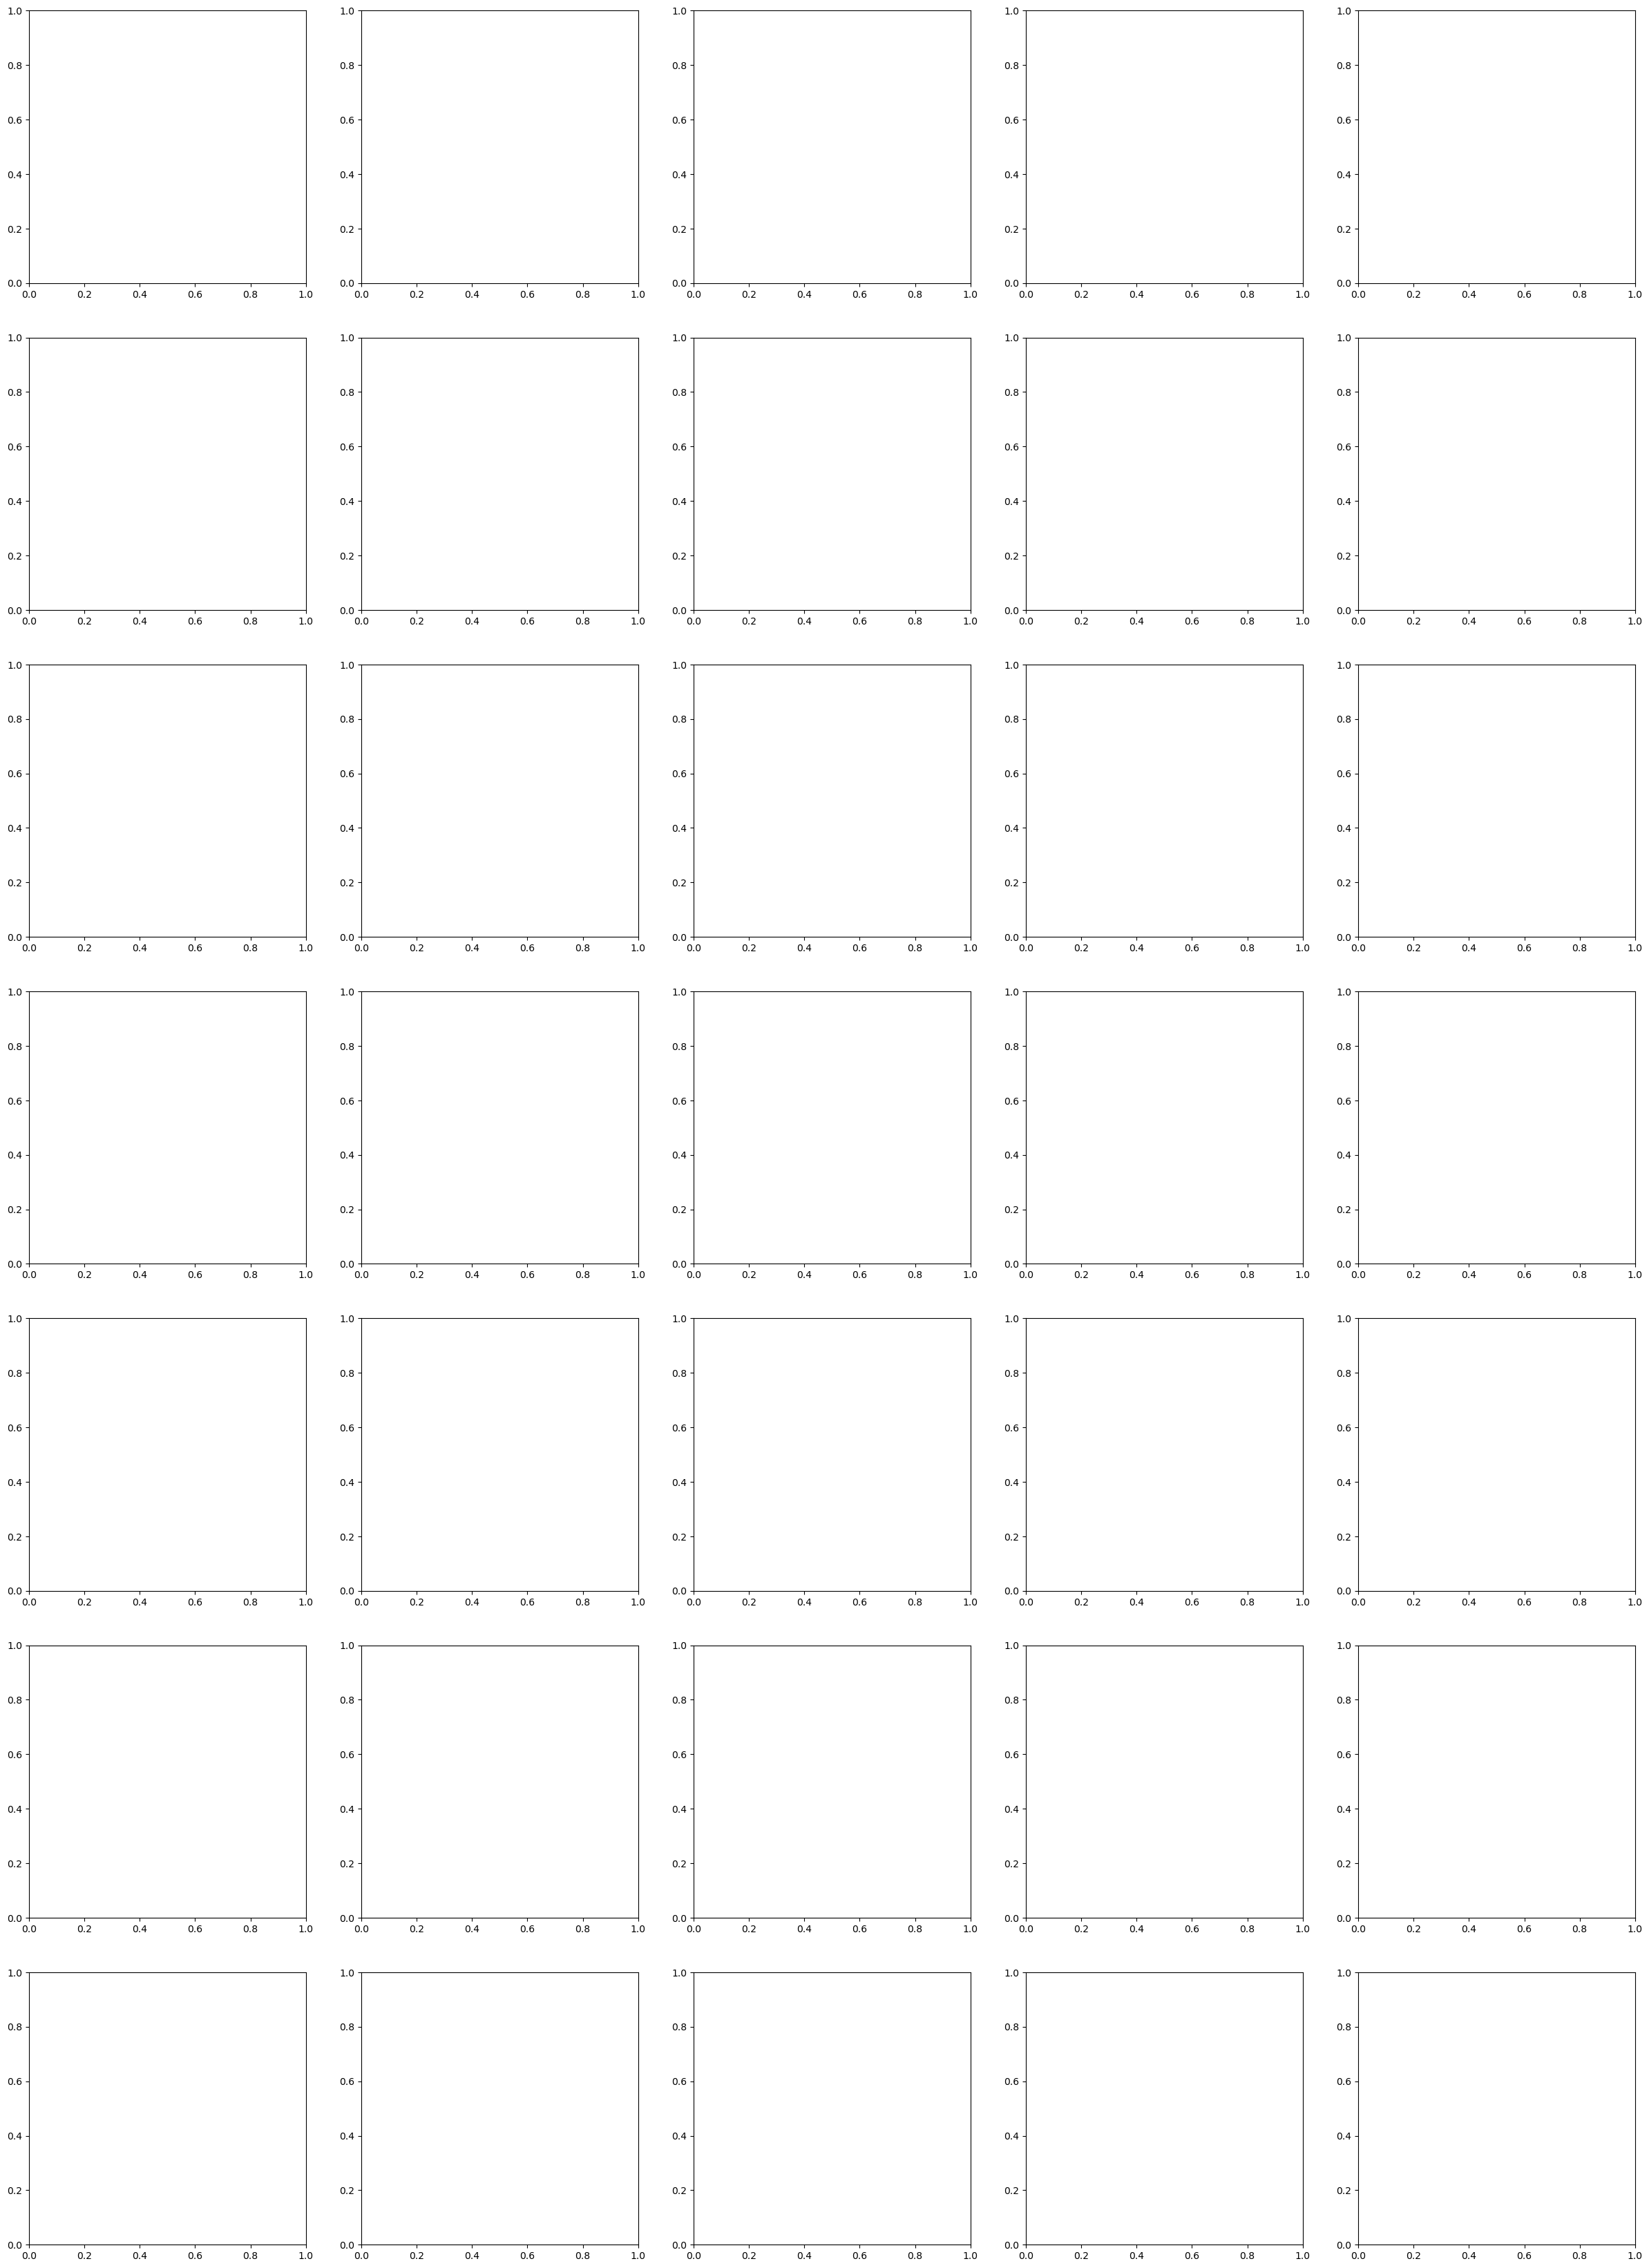

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os


# Organize scatter pairs by cache metrics for columns
cache_metrics = [
    'Cache Miss Rate',
    'L1 Data Cache Load Miss Rate',
    'L2 Demand Data Read Hit Ratio',
    'Offcore All Data Reads LLC miss rate',
    'Offcore Demand Data Reads LLC Miss Rate'
]

branch_metrics = [
    'Executed Branch Misprediction Rate',
    'Retired Branch Misprediction Rate',
    'Executed Conditional Misprediction Rate',
    'Retired Near-Taken to Conditional misprediction Rate',
    'Retired To Executed Branch Rate',
    'Retired to Executed Branch Misprediction Rate',
    'Branch Miss Rate'
]

# Plot 7x5 grid
fig, axes = plt.subplots(7, 5, figsize=(30,42))  # Adjust size as needed

# Loop through rows and columns of the grid
for col_idx, cache_metric in enumerate(cache_metrics):
    for row_idx, branch_metric in enumerate(branch_metrics):
        ax = axes[row_idx, col_idx]

        # Scatter plot for the pair
        ax.scatter(
            attack_rate[cache_metric], 
            attack_rate[branch_metric], 
            color='red', 
            marker='x', 
            label='Attack', 
            alpha=1
        )
        ax.scatter(
            idle_rate[cache_metric], 
            idle_rate[branch_metric], 
            color='blue', 
            marker='.', 
            label='Idle', 
            alpha=1
        )

        # Set titles and labels
        if row_idx == 0:
            ax.set_title(cache_metric, fontsize=10)  # Column titles
        if col_idx == 0:
            ax.set_ylabel(branch_metric, fontsize=8)  # Row labels

        # Turn off legends for individual subplots
        ax.legend().set_visible(False)

# Adjust layout and add a legend
plt.tight_layout()
fig.legend(['Attack', 'Idle'], loc='upper center', ncol=2, fontsize=12)
plt.show()

fig.savefig("../images/paper/Possible Scatterplot.png",dpi=300)
